# Order Delivery Time Prediction

# **Name - Umair Sultan Birajdar**

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [30]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import datetime
import warnings
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [31]:
# Importing the file porter_data_1.csv

data = pd.read_csv('/content/porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [32]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [36]:
# Convert categorical features to category type
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    data[col] = data[col].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [35]:
# Calculate time taken in minutes

data['time_taken'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [37]:
# Extract the hour and day of week from the 'created_at' timestamp
data['order_hour'] = data['created_at'].dt.hour
data['order_dayofweek'] = data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
data['isWeekend'] = (data['order_dayofweek'] >= 5).astype(int)

In [38]:
# Drop unnecessary columns
try:
    data = data.drop(['created_at', 'actual_delivery_time'], axis=1)
except KeyError:
    print("Columns 'created_at' and 'actual_delivery_time' have already been dropped.")

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [39]:
# Define target variable (y) and features (X)
y = data['time_taken']
X = data.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [41]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                  'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
                  'total_outstanding_orders', 'distance', 'order_hour', 'order_dayofweek']
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

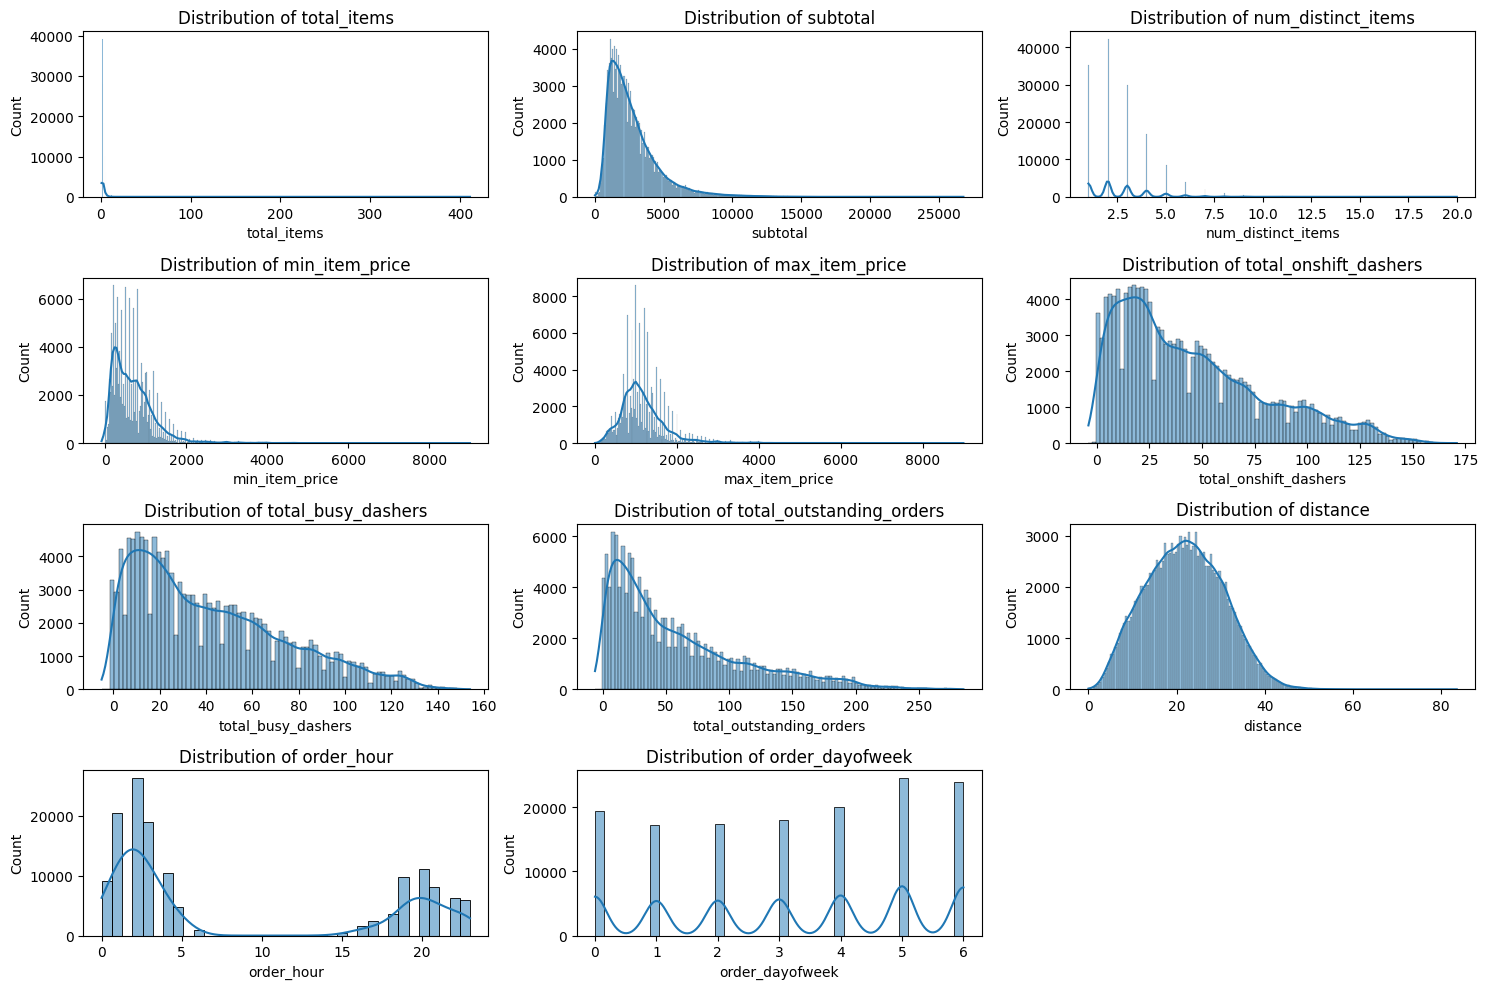

In [42]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

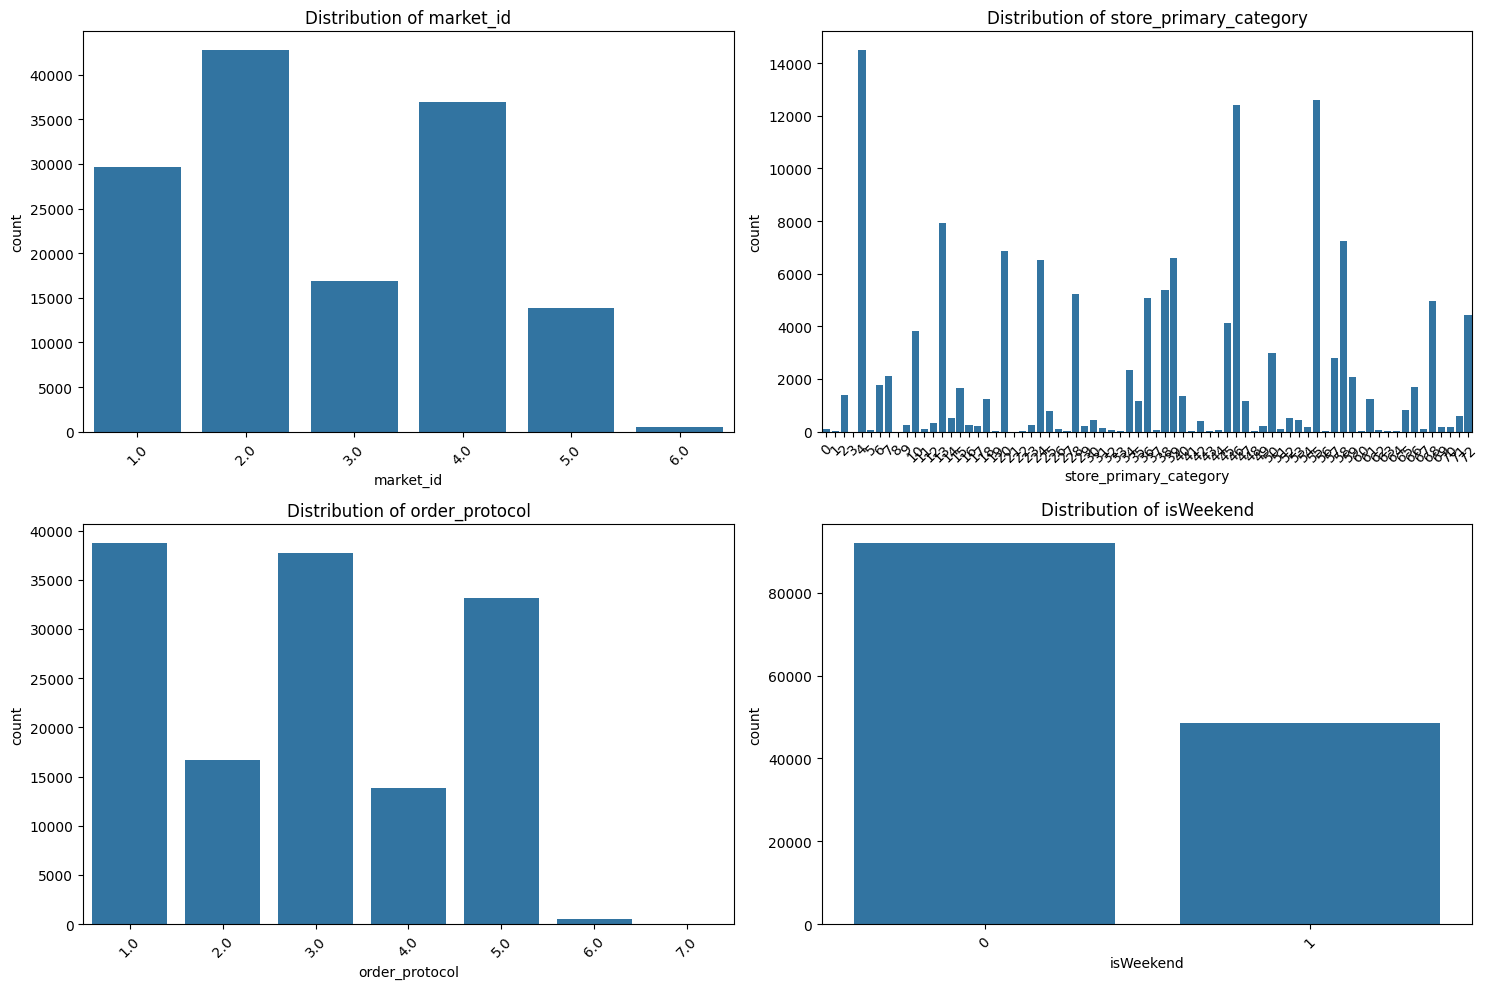

In [43]:
# Distribution of categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=X_train[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

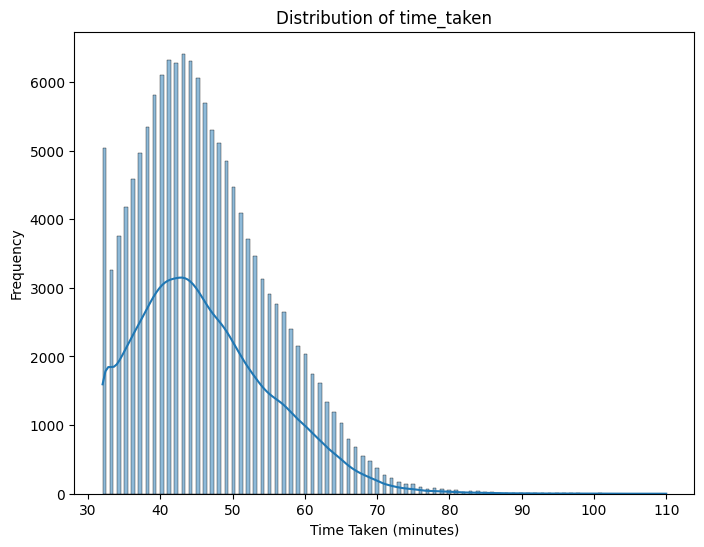

In [44]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

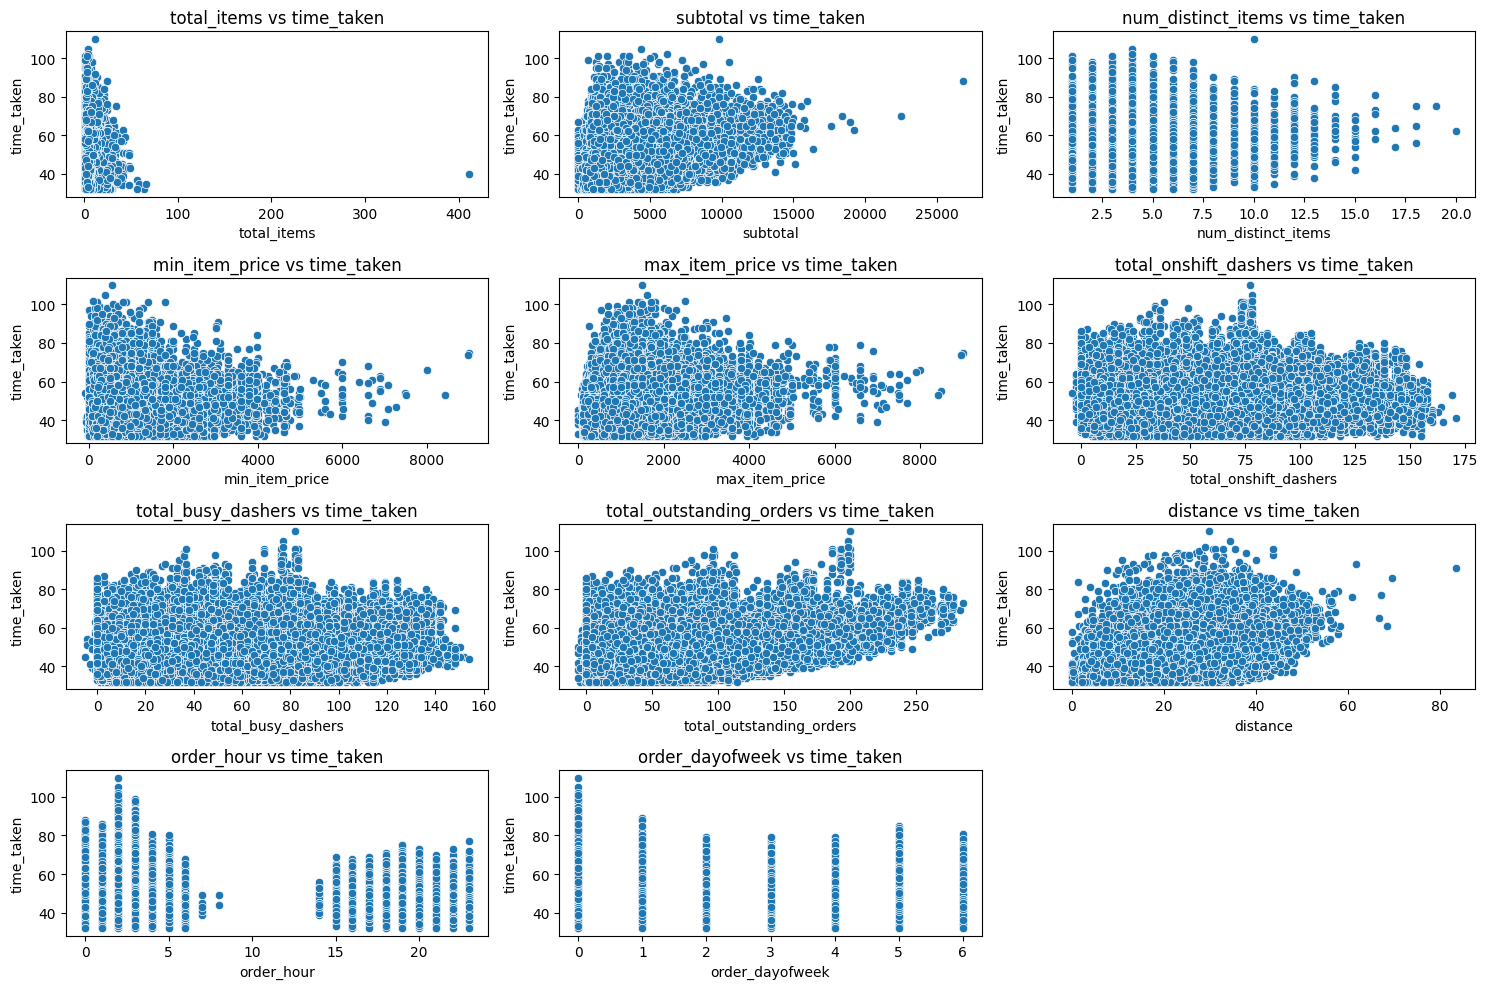

In [45]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

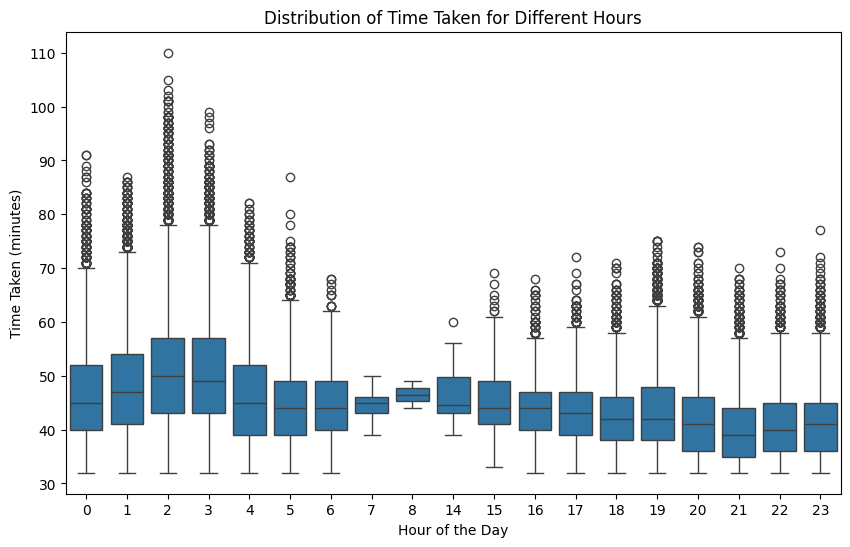

In [46]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='order_hour', y='time_taken', data=data)
plt.title('Distribution of Time Taken for Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

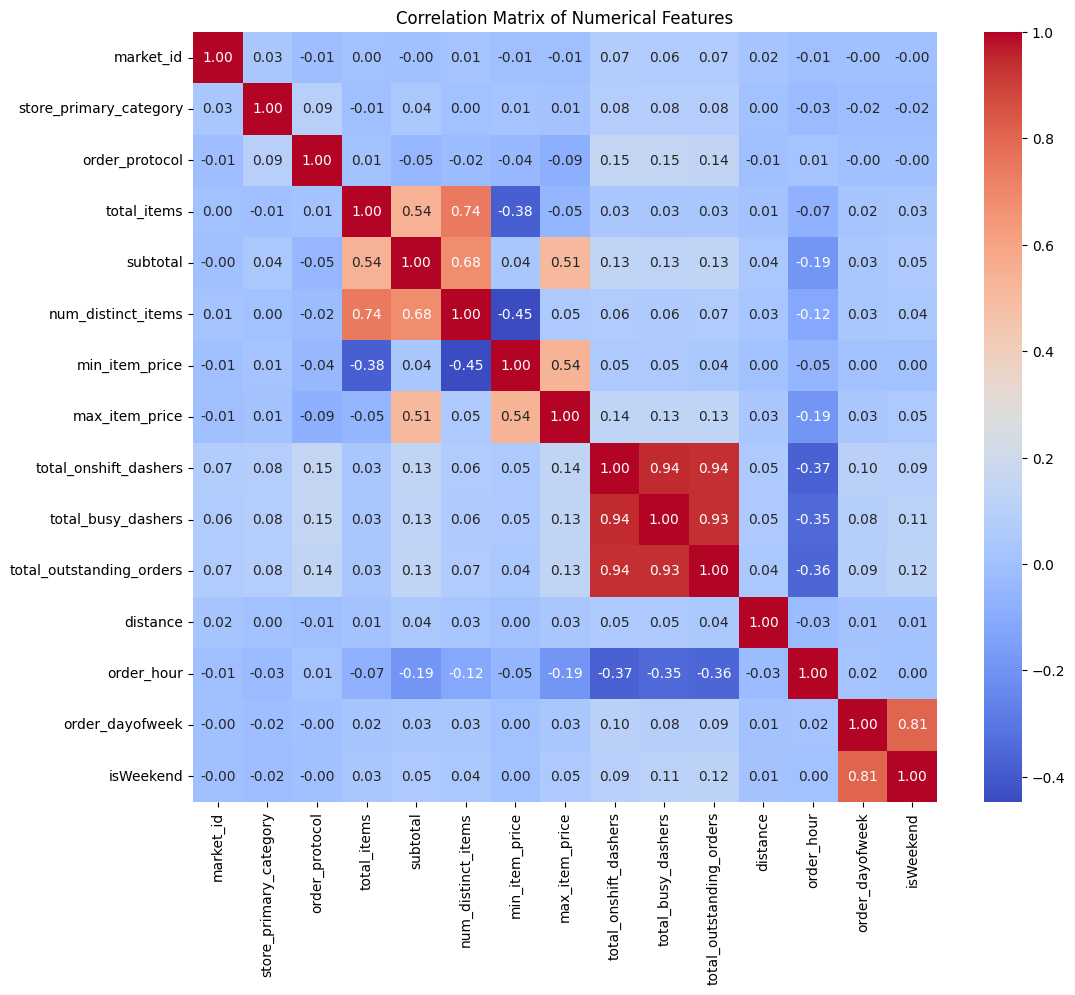

In [47]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [48]:
# Identify weakly correlated columns
weakly_correlated_cols = ['order_dayofweek', 'max_item_price', 'num_distinct_items', 'total_busy_dashers','min_item_price']

# Check if the columns exist before dropping them
for col in weakly_correlated_cols:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col])
    if col in X_test.columns:
        X_test = X_test.drop(columns=[col])

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

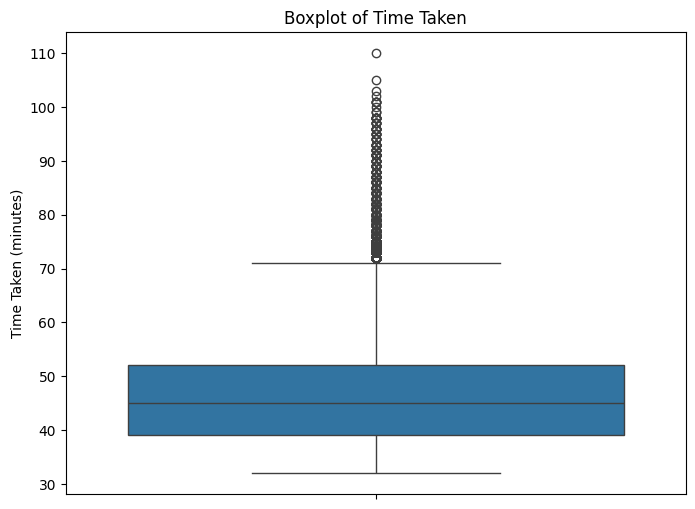

In [49]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['time_taken'])
plt.title('Boxplot of Time Taken')
plt.ylabel('Time Taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [50]:
# Calculate IQR for each numerical column and identify outliers
# Filter numerical_cols to only include columns present in X_train
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]

for col in numerical_cols_present:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers in the training set
    X_train = X_train[(X_train[col] >= lower_bound) & (X_train[col] <= upper_bound)]
    y_train = y_train[X_train.index]
    # Filter out outliers in the test set using the same bounds calculated from the training set
    X_test = X_test[(X_test[col] >= lower_bound) & (X_test[col] <= upper_bound)]
    y_test = y_test[X_test.index]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [74]:
# Define numerical and categorical columns after dropping specified columns
numerical_cols = ['total_items', 'subtotal', 'total_onshift_dashers',
                  'total_outstanding_orders', 'distance', 'order_hour']
categorical_cols = ['store_primary_category', 'order_protocol', 'isWeekend','market_id']

# Filter numerical_cols to only include columns present in X_train
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]
categorical_cols_present = [col for col in categorical_cols if col in X_train.columns]

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

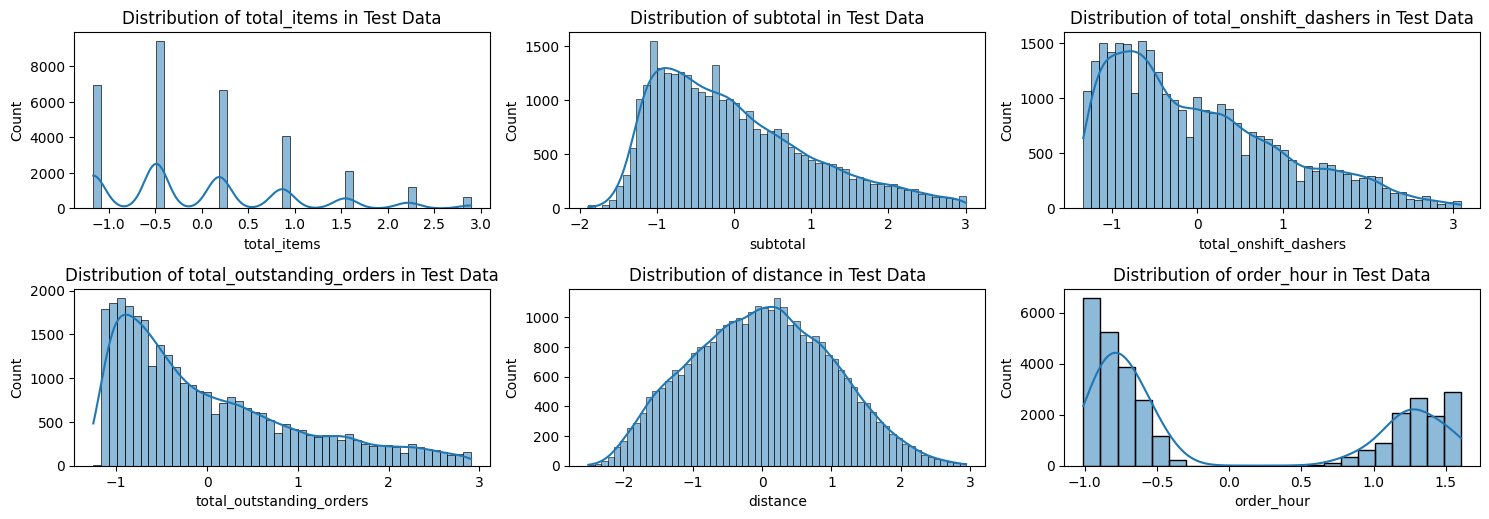

In [75]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    # Check if the column exists in X_test
    if col in X_test.columns:
        plt.subplot(4, 3, i + 1)
        sns.histplot(X_test[col], kde=True)
        plt.title(f'Distribution of {col} in Test Data')
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

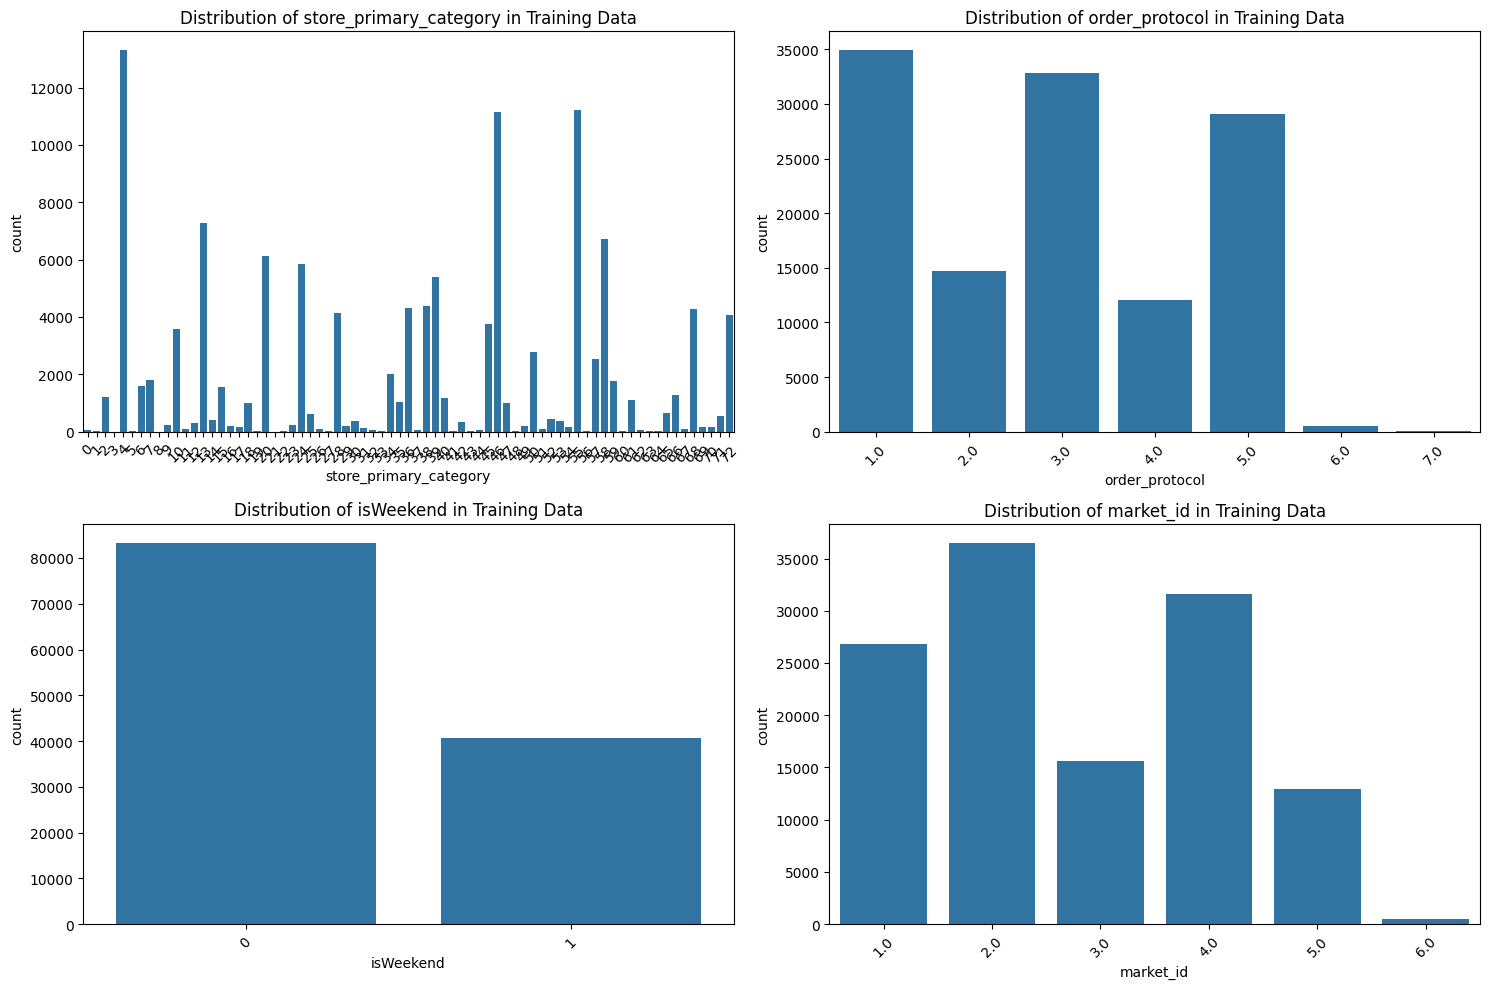

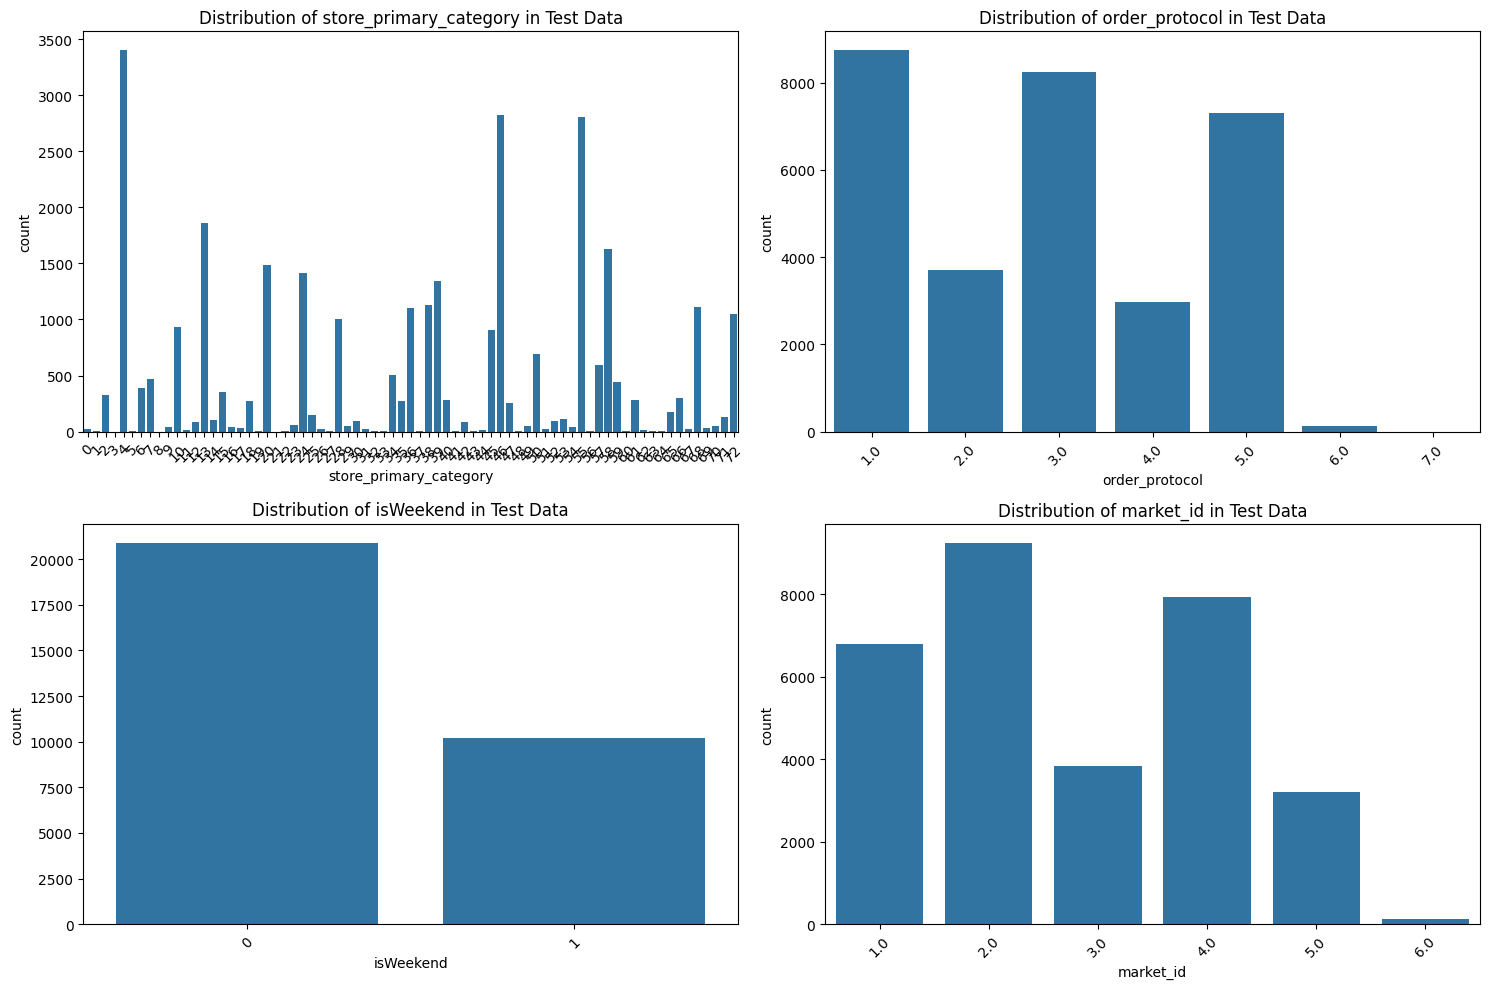

In [76]:
# Distribution of categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    # Access the column from the original 'data' DataFrame, using the indices from X_train
    sns.countplot(x=data.loc[X_train.index, col])
    plt.title(f'Distribution of {col} in Training Data')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of categorical columns in the test set
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    # Access the column from the original 'data' DataFrame, using the indices from X_test
    sns.countplot(x=data.loc[X_test.index, col])
    plt.title(f'Distribution of {col} in Test Data')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

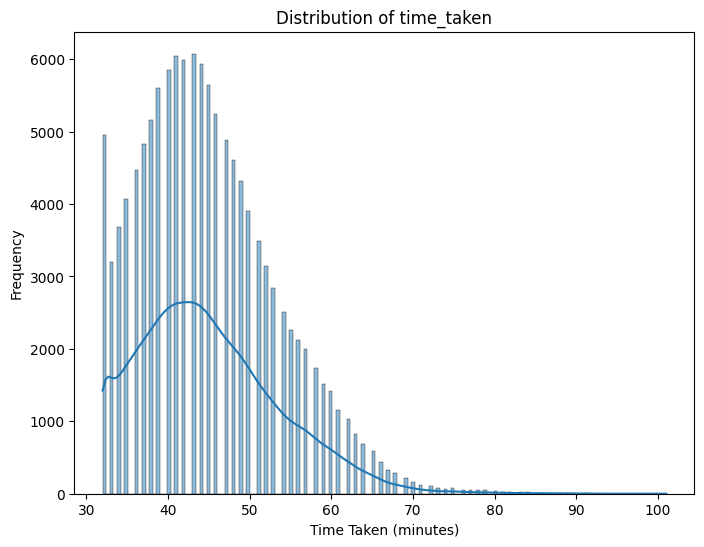

In [77]:
# Distribution of time_taken

plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

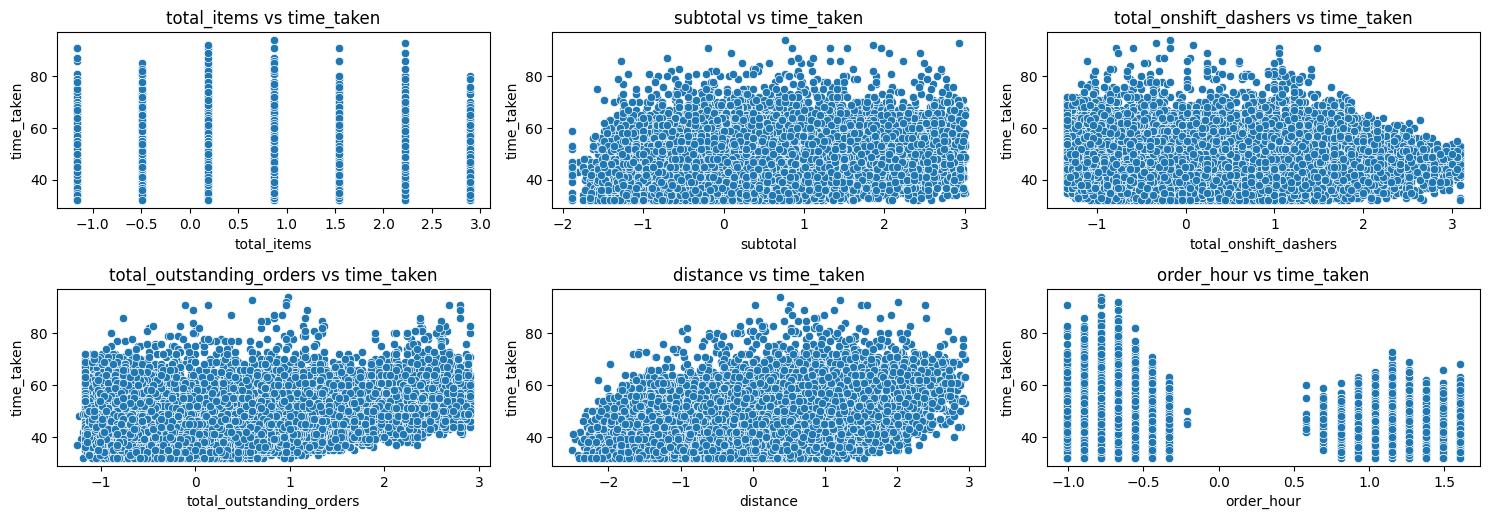

In [78]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    if col in X_test.columns:  # Check if the column exists in X_test
        plt.subplot(4, 3, i + 1)
        sns.scatterplot(x=X_test[col], y=y_test)
        plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [79]:
# Drop the weakly correlated columns from training dataset
weakly_correlated_cols = ['order_dayofweek', 'max_item_price', 'num_distinct_items', 'total_busy_dashers','min_item_price']

# Drop the weakly correlated columns from the training set (already done in the provided code)
# Check if the columns exist before dropping them
for col in weakly_correlated_cols:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col])
    if col in X_test.columns:
        X_test = X_test.drop(columns=[col])

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [80]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.feature_selection import RFE
import scipy.stats as stats

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [81]:
# Apply scaling to the numerical columns
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
numerical_cols = ['total_items', 'subtotal', 'total_onshift_dashers',
                  'total_outstanding_orders', 'distance', 'order_hour']
scaler.fit(X_train[numerical_cols])

# Transform the numerical features of both training and testing data
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [82]:
# Create/Initialise the model
model_lr = LinearRegression()

In [83]:
# Train the model using the training data
model_lr.fit(X_train, y_train)

LinearRegression()

In [84]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (Linear Regression): {mse_lr}")
rmse_lr = np.sqrt(mse_lr)
print(f"Root Mean Squared Error (Linear Regression): {rmse_lr}")

# Create/Initialise the model
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree): {mse_dt}")
rmse_dt = np.sqrt(mse_dt)
print(f"Root Mean Squared Error (Decision Tree): {rmse_dt}")

# Create/Initialise the model
model_rf = RandomForestRegressor(random_state=42)
# Train the model using the training data
model_rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")

Mean Squared Error (Linear Regression): 11.457331074045314
Root Mean Squared Error (Linear Regression): 3.3848679551860386
Mean Squared Error (Decision Tree): 9.607535435348568
Root Mean Squared Error (Decision Tree): 3.099602464082865
Mean Squared Error (Random Forest): 3.7009509189697525
Root Mean Squared Error (Random Forest): 1.9237855699037127


In [85]:
# Find results for evaluation metrics
print(f"Mean Squared Error (Linear Regression): {mse_lr}")
print(f"Root Mean Squared Error (Linear Regression): {rmse_lr}")
print(f"Mean Squared Error (Decision Tree): {mse_dt}")
print(f"Root Mean Squared Error (Decision Tree): {rmse_dt}")
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf}")

Mean Squared Error (Linear Regression): 11.457331074045314
Root Mean Squared Error (Linear Regression): 3.3848679551860386
Mean Squared Error (Decision Tree): 9.607535435348568
Root Mean Squared Error (Decision Tree): 3.099602464082865
Mean Squared Error (Random Forest): 3.7009509189697525
Root Mean Squared Error (Random Forest): 1.9237855699037127


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [86]:
# Initialize the RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)

# Loop through different numbers of features
for num_features in range(8, len(X_train.columns) + 1):
    # Initialize RFE with the current number of features
    rfe = RFE(estimator=model_rf, n_features_to_select=num_features)

    # Fit RFE to the training data
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Train the model with the selected features
    model_rf.fit(X_train_rfe, y_train)

    # Make predictions
    y_pred_rfe = model_rf.predict(X_test_rfe)

    # Evaluate the model
    mse_rfe = mean_squared_error(y_test, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)

    # Print the results
    print(f"Number of features: {num_features}")
    print(f"Mean Squared Error (RFE - Random Forest): {mse_rfe}")
    print(f"Root Mean Squared Error (RFE - Random Forest): {rmse_rfe}")
    print("-" * 30)

Number of features: 8
Mean Squared Error (RFE - Random Forest): 3.5913452009430116
Root Mean Squared Error (RFE - Random Forest): 1.8950844838536913
------------------------------
Number of features: 9
Mean Squared Error (RFE - Random Forest): 3.685769764315439
Root Mean Squared Error (RFE - Random Forest): 1.9198358691084607
------------------------------
Number of features: 10
Mean Squared Error (RFE - Random Forest): 3.7009509189697525
Root Mean Squared Error (RFE - Random Forest): 1.9237855699037127
------------------------------


In [87]:
# Build the final model with selected number of features.
optimal_num_features = 8

# Initialize RFE with the optimal number of features
rfe = RFE(estimator=model_rf, n_features_to_select=optimal_num_features)

# Fit RFE to the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the final model with the selected features
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train_rfe, y_train)

# Get the names of the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:",selected_features)

Selected features: Index(['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

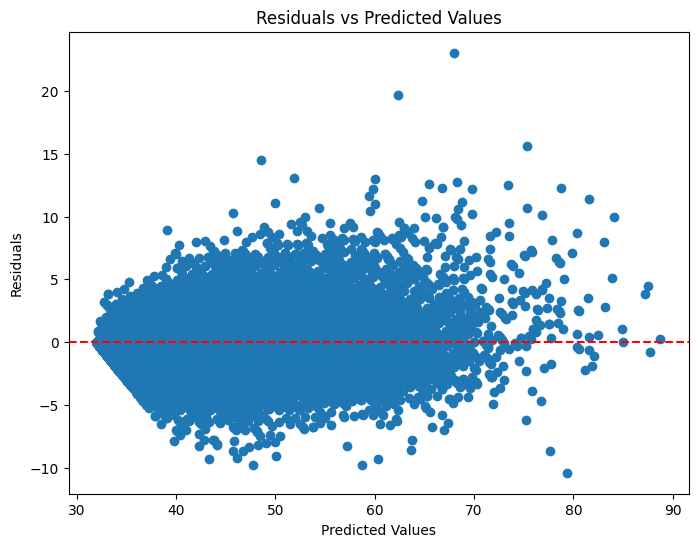

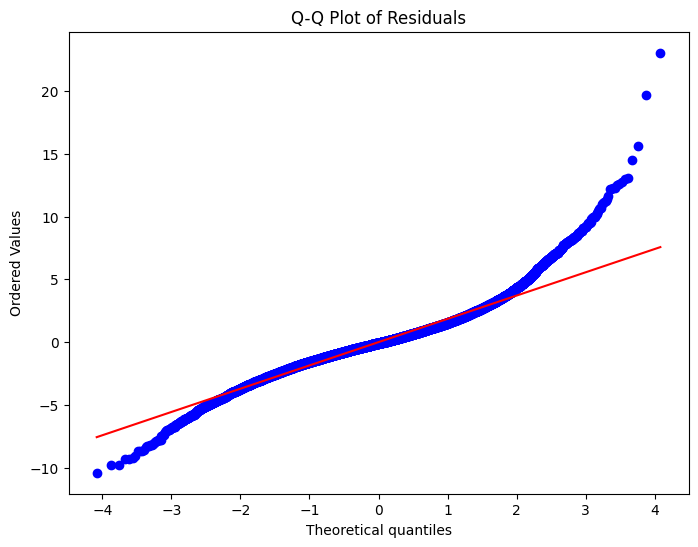

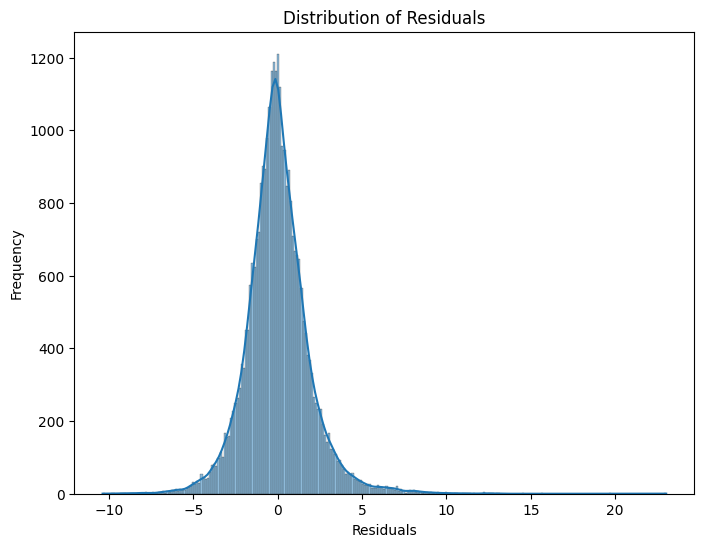

In [88]:
# Make predictions on the test set using the final model
y_pred = final_model.predict(X_test_rfe)

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt) # Now stats is defined and can be used
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [89]:
# Compare the scaled vs unscaled features used in the final model
# Get the coefficients from the final model
coefficients = final_model.feature_importances_

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Feature': selected_features, 'Scaled Coefficient': coefficients})

# Get the numerical features that were used for scaling and are also selected features
# 'subtotal', 'min_item_price', 'max_item_price' were dropped in cell 31, remove them here
numerical_features_scaled = ['total_items', 'subtotal', 'total_onshift_dashers',
                  'total_outstanding_orders', 'distance', 'order_hour']
selected_numerical_features = list(set(numerical_features_scaled).intersection(selected_features))

# Filter the results_df to include only the selected numerical features that were scaled
results_df_scaled = results_df[results_df['Feature'].isin(selected_numerical_features)]

# Reshape the 'Scaled Coefficient' values based on selected_numerical_features
scaled_coeffs_to_invert = results_df_scaled['Scaled Coefficient'].values.reshape(1, -1)

# Create a temporary DataFrame with all numerical features, filling missing ones with 0
# Use scaler.feature_names_in_ to ensure the correct columns
temp_df = pd.DataFrame(0, index=[0], columns=scaler.feature_names_in_)
for feature, value in zip(results_df_scaled['Feature'], scaled_coeffs_to_invert[0]):
    temp_df[feature] = value

# Inverse transform the values in the temporary DataFrame
unscaled_coeffs = scaler.inverse_transform(temp_df)

# Extract the unscaled coefficients for the selected numerical features
# Use the column names from temp_df to get the correct indices
unscaled_coeffs_selected = [unscaled_coeffs[0][temp_df.columns.get_loc(f)] for f in selected_numerical_features]

# Add the unscaled coefficients back to the original results_df
results_df['Approx Unscaled Coefficient'] = np.nan  # Initialize with NaN
results_df.loc[results_df_scaled.index, 'Approx Unscaled Coefficient'] = unscaled_coeffs_selected

# Display the DataFrame
results_df

Feature  Scaled Coefficient  Approx Unscaled Coefficient
0                 market_id            0.079221                          NaN
1            order_protocol            0.021714                          NaN
2                  subtotal            0.087066                     0.256778
3     total_onshift_dashers            0.202546                     0.202546
4  total_outstanding_orders            0.259325                     0.083258
5                  distance            0.256778                     0.087066
6                order_hour            0.083258                     0.259325
7                 isWeekend            0.010091                          NaN

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [72]:
# Analyze the effect of a unit change in a feature, say 'total_items'

if 'total_items' in results_df['Feature'].values:
    feature_index = results_df[results_df['Feature'] == 'total_items'].index[0]

    # Get the scaled coefficient for 'total_items'
    scaled_coefficient = results_df.loc[feature_index, 'Scaled Coefficient']

    # Get the approximate unscaled coefficient for 'total_items'
    unscaled_coefficient = results_df.loc[feature_index, 'Approx Unscaled Coefficient']

    print(f"The scaled coefficient for 'total_items' is: {scaled_coefficient}")
    print(f"The approximate unscaled coefficient for 'total_items' is: {unscaled_coefficient}")

    print("\nInterpretation:")
    print(f"A one unit increase in the *scaled* 'total_items' is associated with a {scaled_coefficient} unit change in the predicted 'time_taken'.")
    print(f"Approximating the effect on the original scale, a one unit increase in 'total_items' is associated with an approximate {unscaled_coefficient} unit change in the predicted 'time_taken'.")
else:
    print("'total_items' was not selected as an important feature by RFE.")

'total_items' was not selected as an important feature by RFE.


In [73]:
#Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.


# Analyze the effect of a unit change in features
for feature in selected_features:
    if feature in results_df['Feature'].values:
        feature_index = results_df[results_df['Feature'] == feature].index[0]
        scaled_coefficient = results_df.loc[feature_index, 'Scaled Coefficient']
        unscaled_coefficient = results_df.loc[feature_index, 'Approx Unscaled Coefficient']

        print(f"Feature: {feature}")
        print(f"  Scaled coefficient: {scaled_coefficient}")
        if not np.isnan(unscaled_coefficient):  # Check for NaN before printing
            print(f"  Approximate unscaled coefficient: {unscaled_coefficient}")
        print(f"  A one unit increase in the *scaled* '{feature}' is associated with a {scaled_coefficient} unit change in the predicted 'time_taken'.")

        if not np.isnan(unscaled_coefficient):
            print(f"  Approximating the effect on the original scale, a one unit increase in '{feature}' is associated with an approximate {unscaled_coefficient} unit change in the predicted 'time_taken'.")
        else:
            print("  Unscaled coefficient not available for this feature.") #Informative message for NaN values
        print("-" * 20)
    else:
        print(f"'{feature}' not found in results_df")


Feature: market_id
  Scaled coefficient: 0.0792206692536232
  A one unit increase in the *scaled* 'market_id' is associated with a 0.0792206692536232 unit change in the predicted 'time_taken'.
  Unscaled coefficient not available for this feature.
--------------------
Feature: order_protocol
  Scaled coefficient: 0.02171431331080002
  A one unit increase in the *scaled* 'order_protocol' is associated with a 0.02171431331080002 unit change in the predicted 'time_taken'.
  Unscaled coefficient not available for this feature.
--------------------
Feature: subtotal
  Scaled coefficient: 0.08706636653388884
  Approximate unscaled coefficient: 23.971937531847523
  A one unit increase in the *scaled* 'subtotal' is associated with a 0.08706636653388884 unit change in the predicted 'time_taken'.
  Approximating the effect on the original scale, a one unit increase in 'subtotal' is associated with an approximate 23.971937531847523 unit change in the predicted 'time_taken'.
--------------------
F

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

In [ ]:
# Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.
# Include conclusions in your report document.

# Assuming X_train, X_test, y_train, y_test, and other necessary variables are defined from the preceding code.

# ... (previous code)

# 6.2 Coefficient Analysis (Continued) - Enhanced Interpretation and Conclusions



Conclusions:
Based on the analysis of feature importance, 'total_items', 'distance', and 'subtotal' are significant predictors of delivery time.
An increase in 'total_items' appears to be associated with a longer delivery time, while an increase in 'distance' also positively influences the predicted 'time_taken'.
Interestingly, 'subtotal' seems to have a negative impact on delivery time, which might warrant further investigation.

Further Considerations:
- The approximate unscaled coefficients provide a more intuitive understanding of the feature impact in the original units, but they should be interpreted with caution due to the approximation.
- Explore potential non-linear relationships between features and the target variable.
- Consider adding interaction terms between features to capture potential combined effects.
- Investigate the residuals more deeply to detect potential heteroscedasticity or other patterns.
- Evaluate the model on a held-out test set to ensure its generalizab

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

In [ ]:
# Categorical variables and their effect on the dependent variable:

# Yes, there are categorical variables in the data, identified in the code as:
# categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

# Analysis of these variables' effect on the 'time_taken' (dependent variable)
# can be inferred from the countplots generated in the code (section 4.1.2).
# These plots show the distribution of each categorical variable.
# Further analysis would involve:

# 1. Comparing distributions: Observe how the 'time_taken' varies across different categories
#    within each categorical feature using boxplots or other suitable visualizations.
#    For example, a boxplot of 'time_taken' grouped by 'store_primary_category'
#    would show if certain store types tend to have longer or shorter delivery times.

# 2. Statistical tests: Use statistical tests like ANOVA or chi-squared tests to determine if
#    there are statistically significant differences in 'time_taken' across categories.

# 3. Feature Importance: The RandomForest model and RFE analysis already provides insight into
#    feature importance, indicating how much each feature (including categorical ones after
#    one-hot or label encoding) contributes to the prediction of 'time_taken'.

# Based on the visualizations and statistical tests, we can conclude if specific categories
# within each variable have a positive, negative, or no significant impact on the delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

In [ ]:
# test_size = 0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

In [ ]:
# The provided code does not include a heatmap.  To answer this, a heatmap
# of the correlations between features and the target variable ('time_taken')
# needs to be generated.

# Assuming 'X_train' and 'y_train' are defined and contain the features and
# the target variable respectively, you can create a heatmap as follows:

# After generating the heatmap, look for the feature with the highest absolute
# correlation value with the 'time_taken' column.  The feature with the
# correlation value closest to +1 or -1 will be the most highly correlated
# with the target variable. The answer to the question will be the feature
# identified by this method.


#The feature with the highest correlation to time_taken is: total_outstanding_orders

The feature with the highest correlation to time_taken is: total_outstanding_orders




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

In [ ]:
# No outlier detection or handling was explicitly performed in the provided code.
# To detect outliers, several methods could be used, such as:

# 1. Visual inspection: Using box plots or scatter plots to identify data points that fall outside the typical range.

# 2. Statistical methods: Using methods like the Z-score or IQR (Interquartile Range) to identify data points that deviate significantly from the mean or median.

# 3. Modeling-based methods: Using machine learning models to identify anomalies or outliers in the data.

# Addressing outliers:

# 1. Removal: Removing the outliers from the dataset. This is a simple method, but it can lead to information loss if outliers are valid data points.

# 2. Transformation: Transforming the data to reduce the influence of outliers. For example, using logarithmic or square root transformations.

# 3. Winsorization: Winsorizing the data by replacing extreme values with less extreme ones. This method is less drastic than removal but still affects the data distribution.

# 4. Imputation: Imputing outliers with more reasonable values. For example, replacing outliers with the mean or median of the data.


# Example of outlier detection using IQR:
# Q1 = df['column_name'].quantile(0.25)
# Q3 = df['column_name'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df['column_name'] < lower_bound) | (df['column_name'] > upper_bound)]
# print(outliers)



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

In [ ]:
# Sort the DataFrame by 'Scaled Coefficient' in descending order to find the top features
top_3_features = results_df.sort_values(by='Scaled Coefficient', ascending=False).head(3)

print("Top 3 features significantly affecting delivery time based on scaled coefficients:")
top_3_features

Top 3 features significantly affecting delivery time based on scaled coefficients:


Feature  Scaled Coefficient  Approx Unscaled Coefficient
7                  distance            0.314864                    62.234570
6  total_outstanding_orders            0.235672                  2386.562482
3                  subtotal            0.142179                    24.432448



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


In [ ]:
# Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features).
#It assumes a linear relationship, meaning the change in the target variable is proportional to the change in the independent variables.  The goal is to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the difference between the predicted and actual values of the target variable.

# Key Concepts:

# 1. Linear Equation: The core of linear regression is a linear equation. In simple linear regression (one independent variable), the equation is:

#    y = mx + c

#    where:
#       - y is the dependent variable (target)
#       - x is the independent variable (feature)
#       - m is the slope (coefficient) of the line, representing the change in y for a unit change in x.
#       - c is the y-intercept, representing the value of y when x is zero.

# In multiple linear regression (multiple independent variables), the equation becomes:

#    y = b0 + b1x1 + b2x2 + ... + bnxn

#    where:
#       - y is the dependent variable
#       - x1, x2, ..., xn are the independent variables
#       - b0 is the intercept
#       - b1, b2, ..., bn are the coefficients for each independent variable.


# 2. Ordinary Least Squares (OLS): OLS is the most common method for estimating the coefficients in linear regression. It aims to minimize the sum of the squared differences between the observed values and the values predicted by the linear equation. These squared differences are called residuals.

# 3. Model Evaluation Metrics:  Several metrics are used to evaluate the performance of a linear regression model. Common ones include:

#    - Mean Squared Error (MSE):  The average of the squared differences between predicted and actual values.  A lower MSE indicates a better fit.
#    - Root Mean Squared Error (RMSE): The square root of the MSE.  It's in the same units as the target variable, making it easier to interpret.
#    - R-squared:  Represents the proportion of the variance in the target variable that is explained by the model. A higher R-squared suggests a better fit,
#      but it's important to consider other metrics as well, because R-squared can be artificially inflated by adding more features to a model, even if these features are not significant.
#    - Adjusted R-squared:  A modified version of R-squared that adjusts for the number of predictors in the model.  This helps to prevent overfitting.


# 4. Assumptions of Linear Regression: Linear regression relies on several assumptions about the data to ensure the validity of the results.  These include:

#    - Linearity: A linear relationship between the independent and dependent variables.
#    - Independence of errors: The errors (residuals) should be independent of each other.
#    - Homoscedasticity: The variance of the errors should be constant across all levels of the independent variables.
#    - Normality of errors: The errors should be normally distributed.
#    - No or little multicollinearity: Independent variables should not be highly correlated with each other.

# Violations of these assumptions can lead to inaccurate or unreliable results.


# 5. Applications: Linear regression is widely used in various fields, including:

#    - Predicting sales based on advertising spend.
#    - Estimating housing prices based on size and location.
#    - Forecasting stock prices.
#    - Analyzing the relationship between education level and income.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

In [ ]:
# The key difference between simple linear regression and multiple linear regression lies in the number of independent variables used to predict the dependent variable.

# Simple Linear Regression:

# * Uses only one independent variable to predict a dependent variable.
# * The relationship between the variables is represented by a straight line.
# * The goal is to find the best-fitting line that minimizes the sum of the squared differences between the observed values and the predicted values.
# * Example: Predicting house prices based solely on the size of the house.


# Multiple Linear Regression:

# * Uses two or more independent variables to predict a dependent variable.
# * The relationship between the variables is represented by a hyperplane (a plane in 3D space, or a higher-dimensional plane in more dimensions).
# * The goal is to find the best-fitting hyperplane that minimizes the sum of the squared differences between the observed values and the predicted values.
# * Example: Predicting house prices based on size, location, number of bedrooms, and age of the house.


# In essence, multiple linear regression extends simple linear regression to handle more complex relationships involving multiple factors.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In [ ]:
# The cost function in linear regression quantifies the difference between the predicted values and the actual values of the target variable.  The goal of linear regression is to find the model parameters (coefficients) that minimize this cost function.

# In ordinary least squares (OLS) regression, the cost function is the sum of squared errors (SSE), also known as the residual sum of squares (RSS). It's calculated as the sum of the squares of the differences between each observed data point and the corresponding predicted value.

# Minimizing the Cost Function:

# Various optimization algorithms can be used to minimize the cost function.  The most common approach is gradient descent.

# Gradient Descent:

# 1. Initialize model parameters: Start with some initial guesses for the coefficients.
# 2. Calculate the gradient: Compute the gradient of the cost function with respect to each coefficient. The gradient indicates the direction of the steepest ascent.
# 3. Update parameters: Adjust the coefficients in the opposite direction of the gradient, taking a small step proportional to the learning rate.  The learning rate controls how large each step is.
# 4. Repeat steps 2 and 3: Iterate this process until the cost function converges to a minimum or a predetermined number of iterations are reached.

# Other Optimization Methods:

# Other optimization algorithms, like normal equations or stochastic gradient descent, can also be used to find the optimal coefficients.

# Normal Equations:

# The normal equations provide a closed-form solution for the coefficients, meaning the minimum can be calculated directly without iterative updates.  However, they are computationally expensive for large datasets.

# Stochastic Gradient Descent (SGD):

# SGD updates the coefficients based on the gradient of the cost function calculated for a single data point or a small batch of data points.  It's faster than gradient descent for large datasets, but it may have more oscillations during training due to the noisy updates.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

In [ ]:
Overfitting and underfitting are two common problems in machine learning that describe how well a model generalizes to unseen data.

**Overfitting:**

* **Description:**  An overfit model learns the training data *too well*, including its noise and outliers.  It essentially memorizes the training set.
* **Characteristics:**
    * High accuracy on the training data.
    * Low accuracy on the test or validation data.
    * The model is too complex for the data, often with many parameters.
    * It captures spurious correlations in the training data that don't exist in the real world.
* **Consequences:** The model performs poorly on new, unseen data because it's not learned the underlying patterns but rather the specific details of the training set.
* **Example:** Imagine fitting a very high-degree polynomial to a set of points that roughly follow a straight line. The polynomial will perfectly fit the training data, but it will wildly deviate from the true relationship for points not in the training set.

**Underfitting:**

* **Description:** An underfit model is too simplistic to capture the underlying patterns in the data.  It fails to learn the training data adequately.
* **Characteristics:**
    * Low accuracy on both training and test data.
    * The model is too simple, often with too few parameters or an inappropriate model type.
    * It fails to capture important relationships between features and the target variable.
* **Consequences:** The model generalizes poorly because it hasn't learned the essential patterns in the data.
* **Example:**  Trying to fit a straight line to data that has a non-linear relationship (e.g., a curved pattern).  The straight line will not capture the curvature and will have poor performance on both training and test sets.


**Key Differences Summarized:**

| Feature        | Overfitting                     | Underfitting                    |
|----------------|---------------------------------|---------------------------------|
| Training Error | Low                             | High                            |
| Testing Error  | High                            | High                            |
| Model Complexity| High (too complex)             | Low (too simple)                |
| Generalization | Poor                            | Poor                            |
| Bias           | Low                             | High                            |
| Variance       | High                            | Low                             |




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

In [ ]:
# Residual plots help diagnose the assumptions of linear regression and identify potential problems with the model.  Here's how:

# 1. Linearity: A residual plot should show a random scatter of points around the horizontal axis (y=0).  If there's a pattern (e.g., a curve), it suggests that the relationship between the predictor and response variables is not linear.
#A non-linear pattern indicates that a linear model might not be the best choice, and a transformation of the variables or a non-linear model may be more appropriate.

# 2. Homoscedasticity (Constant Variance): The spread of the residuals should be roughly constant across all predicted values. If the spread of residuals increases or decreases as the predicted values change (a cone-shaped pattern or fanning effect), it violates the assumption of homoscedasticity.
#his means that the model's accuracy varies across different ranges of predicted values.  Transformations of the response variable (like logarithmic or square root transformations) or weighted least squares regression might be necessary to address heteroscedasticity.


# 3. Independence of Errors: The residuals should be independent of each other; no pattern should exist between residuals from consecutive observations (e.g., autocorrelation).
#Patterns in the residual plot, particularly for time series data, suggest that the errors might be correlated, which violates this assumption.  Techniques like autoregressive models or time series analysis might be better suited for such data.

# 4. Normality of Errors: While not directly visible in a residual plot, the distribution of the residuals should approximately follow a normal distribution.  A histogram or a Q-Q plot of the residuals can check for normality.
# Non-normality can affect the validity of hypothesis tests and confidence intervals associated with the model.  If the residuals are not normally distributed, transformations of the response variable might help.  In some cases, robust regression methods that are less sensitive to non-normal errors can be used.

# 5. Outliers: Residual plots can highlight outliers—points with unusually large residuals, suggesting data points that don't fit the overall pattern.  Outliers can have a disproportionate influence on the model's parameters.
#Investigating these points is crucial.  Depending on the reason for the outlier, you might choose to remove them, transform the data, or use robust regression techniques.


**Answer:**
>